# Superconductivity Individual Analysis



In [59]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Prior to working on this notebook:

1. Extract the transition points ($I$ in paper units) versus pressure readings ($P$ in voltage units scaled to mmHg, called "torr") from the data scans. Make a table.

2. Use the “1958 He Scale of Temperatures” or the [online calculator from Quantum Design](https://qdusa.com/support/helium_vapor_pressure.html) to convert the pressure readings to temperature $T$ (K).

3. Extract the current calibration points (in paper units) versus current readings from the data scan, sheet 2. Make a table.

### Then...
4. Import the tables of temperature versus transition points (in paper units) and calibration current versus calibration points (in paper units) into your Python notebook.

5. Create a calibration function to convert paper units to current, and from current to magnetic field, using the magnet calibration curve in figure 5 of the instructions.

6. Convert the transition points from paper units to magnetic field Hc (gauss).

7. Plot $H_c$ vs. $T$.

8. Fit the above using two different methods: (A) linearize the data, then fit to a line and obtain the slope and intercept, and (B) fit to the functional form of equation (1) in the instructions.  From both ways of fitting, find the critical temperature at zero field $T_c$ and the critical field at 0K $H_{c0}$.

9. Obtain the uncertainties in the results from the fits, and compare them to each other and to the values found in a handbook or text.


## Import data tables

Display them so that you know they are correct.

Import $P(V)$, $T(K)$ and $I$, $dI$ (in paper units).

In [60]:
# reading in the experiment data
data = pd.read_csv('XData.csv')
data

,Torr,K,dI
0,650.3,4.061,0.060000
1,625.5,4.021,0.144706
2,599.7,3.980,0.238824
3,574.9,3.938,0.323529
4,551.3,3.898,0.422353
5,525.4,3.852,0.516471
6,500.6,3.807,0.605882
7,475.0,3.759,0.704941
8,450.0,3.710,0.812941
9,424.3,3.657,0.921176


Next read in the current calibration data: paper-position and Current (amps).

In [61]:
#reading in the calibration data

In [62]:
calib = pd.read_csv('CalibData.csv')
calib

,dI,x
0,0.000,-0.005882
1,0.100,0.502353
2,0.200,1.010590
3,0.300,1.518820
4,0.400,2.022350
5,0.518,2.624710
6,0.599,3.038820
7,0.700,3.547060
8,0.800,4.060000
9,0.900,4.563530


## Fit the current calibration data

Make a line fit, and obtain the slope and intercept.

In [63]:
# Set  up the Model

# Import the Linear model.
from lmfit.models import LinearModel

# create an instance of the model
line = LinearModel()

In [64]:
# Get starting parameters. 
start_params = line.guess(calib['dI'], x=calib['x'])

# Feed these into the fitter and run it.
Line_fit = line.fit(calib['dI'], start_params, x=calib['x'])

# Print the fit results.
Line_fit

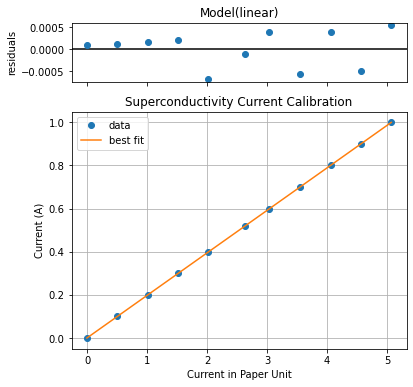

In [65]:
# Make a plot.
Line_fit.plot()
plt.grid(True)
plt.title('Superconductivity Current Calibration')
plt.xlabel('Current in Paper Unit')
plt.ylabel('Current (A)');

## Make a current calibration function


As we can see, the conversion function is I = intercept +slope x dI. So we define this function below (using the given uncertainties):

In [66]:
def x2i(x):
    return unc.ufloat(Line_fit.params['intercept'].value, Line_fit.params['intercept'].stderr,'intercept') + unc.ufloat(Line_fit.params['slope'].value, Line_fit.params['slope'].stderr,'slope')*x

Then we can write another function that converts the current into magnetic field using the decreasing magnetic field equation: y = 13.558 + 423.47 x - 12.509 x^2

In [67]:
def i2b(x):
    return 13.558 + 423.47*x - 12.509*x**2

## Apply the calibration

Convert the transition locations to magnetic field.  You should include uncertainties.

In [68]:
#First convert the x coordinates into current, then convert current into magnetic field.
magneticField = i2b(x2i(data['dI']))

## Plot the reduced data set

Plot the data so that it mirrors the graph shown in figure 1 of the instructions.  If you see peculiar data points, check for mistakes in transcription or other problems.

<ErrorbarContainer object of 3 artists>

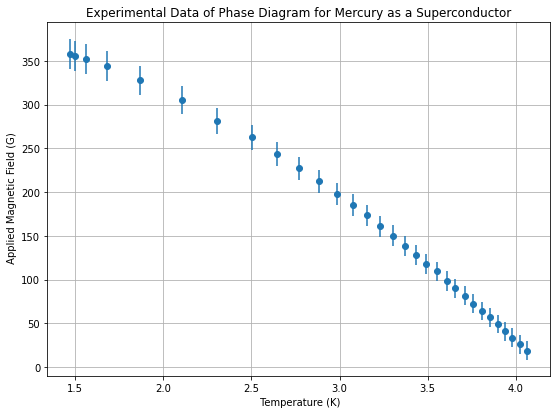

In [69]:
#first convert the uncertainties to arrarys of values and stds:
fieldValue = unp.nominal_values(magneticField)
fieldStd = unp.std_devs(magneticField)
temperature = data['K']
#then plot it
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('Experimental Data of Phase Diagram for Mercury as a Superconductor')
plt.xlabel(r' Temperature (K)')
plt.ylabel(r' Applied Magnetic Field (G)')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.errorbar(temperature, fieldValue, yerr=100*fieldStd, fmt='o')

### (Note: the above error-bars are multiplied by 100 for visulization.)

## Linearize the data

Rescale the data so that the relationship between the <i>x</i> and <i>y</i> values is linear.  Use equation (1) in the instructions as a guide:

$$H_c(T) = H_{c0}\left[1 - \left(\frac{T}{T_c}\right)^2\right]\quad\quad\quad\quad\quad(1)$$

Then plot the results to confirm.

<ErrorbarContainer object of 3 artists>

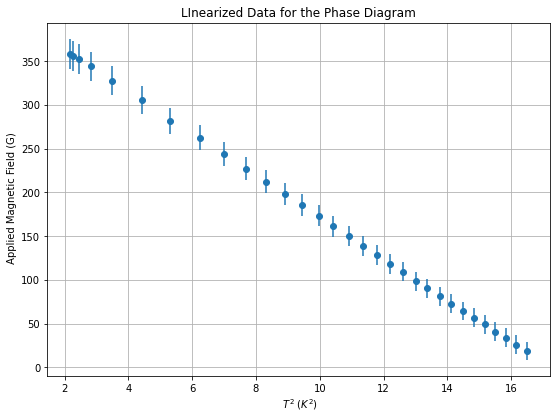

In [70]:
#From the equation, we can see that if we plot the applied magnetic field as a function of temperature squared, the relation should be linear.
tSquare = temperature*temperature
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('LInearized Data for the Phase Diagram')
plt.xlabel(r' $T^2$ ($K^2$)')
plt.ylabel(r' Applied Magnetic Field (G)')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.errorbar(tSquare, fieldValue, yerr=100*fieldStd, fmt='o')

This looks very linear

## Fit the linearized data

Obtain the slope and intercept, plus uncertainty.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 31
    # variables        = 2
    chi-square         = 1661.24589
    reduced chi-square = 57.2843411
    Akaike info crit   = 127.421414
    Bayesian info crit = 130.289388
    R-squared          = 0.99544867
[[Variables]]
    slope:     -23.8060657 +/- 0.04098890 (0.17%) (init = -23.82761)
    intercept:  409.994904 +/- 0.49759592 (0.12%) (init = 410.2599)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.943


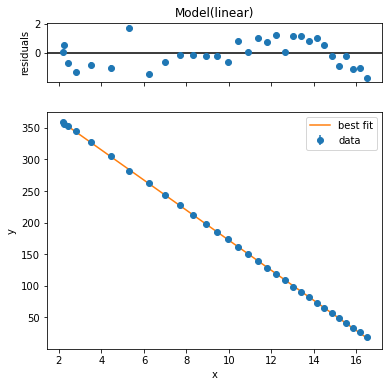

In [80]:
# Get starting parameters. 
start_params = line.guess(fieldValue, x=tSquare)

# We can feed the errorbars that we have obtained for the magnetic field to the fit, using 1/std as the weights.
Line_fit = line.fit(fieldValue, start_params, x=tSquare, weights=1/fieldStd)

# Print the fit results.
Line_fit

#plot the result
print(Line_fit.fit_report())
Line_fit.plot();

## Make a nice big, clear plot

Calculate the fit line from eval() and make a large plot, with a grid, data-points with error bars and the fit line on top of the data.  Make sure the fit line goes through both axes so that you can read the critical fiels and critical temperature-squared directly from the plot.

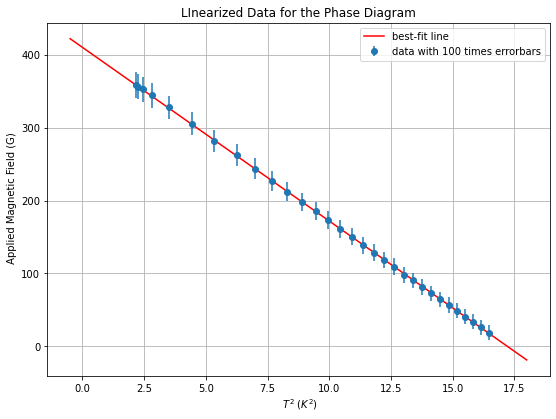

In [76]:
fit_x = np.linspace(-0.5,18,20)
fitline = Line_fit.eval(Line_fit.params, x = fit_x)
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('LInearized Data for the Phase Diagram')
plt.xlabel(r' $T^2$ ($K^2$)')
plt.ylabel(r' Applied Magnetic Field (G)')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.errorbar(tSquare, fieldValue, yerr=100*fieldStd, fmt='o',label='data with 100 times errorbars')
plt.plot(fit_x, fitline, '-r',label = 'best-fit line')
plt.legend()

## Obtain the critical field and temperature

Calculate $H_{c0}$ and $T_c$ from the fit results (with uncertainty): from equation 1, we know $H = H_0 - \frac{H_0}{T_c^2}* T^2$

In [84]:
#H_0 is the y-intercept of the fit
h0 = unc.ufloat(Line_fit.params['intercept'].value, Line_fit.params['intercept'].stderr,'intercept')

#so T_C can be calculate from the slope of the fit
tc = 1/((-1)*unc.ufloat(Line_fit.params['slope'].value, Line_fit.params['slope'].stderr,'slope')/h0)

print('The critical temperature at zero field is {:.2uP} K'.format(tc))
print('The critical field at zero temperature is {:.2uP} G'.format(h0))

The critical temperature at zero field is 17.222±0.036 K
The critical field at zero temperature is 409.99±0.50 G


## Fit the "unlinearized" data

Use the LMFit `Model()` class to create a non-linear fit function in the form of equation (1).  Then use it to fit the unlinearized data of $H_c$ vs. $T$ directly.  In this version, the fit parameters should be the values of $H_{c0}$ vs. $T_c$.  

An example of using the `Model()` class to fit an arbitrary function is given in this notebook: [Example of LMFit Model Custom Function](Example%20LMFit%20Model%20with%20Arbitrary%20Function.ipynb) (The notebook should be in your working subdirectory).

## Make another big, clear plot

Make a nice plot for this type of fit, similar to what you did above, showing the fit line intersecting both axes.

## Compare the fit results

Compare the fit results from both procedures to each other: do they agree within their uncertainty?  Do the fit results agree with handbook or text values?  Print the all in a single table for easy comparison.

In [75]:
# Example table
#
# print('Comparison of fit results:')
# print('   Tc (K)   |   Hc0 (G)   ')
# print('------------|-------------')
# print('{:.2uP} | {:.2uP}     (from linearized data)'.format(uTc_1,uHc0_1))
# print('{:.1uP} | {:.2uP}     (from nonlinear fit)'.format(uTc_2,uHc0_2))
# print('{:8.2f}    | {:.1f}         (handbook)'.format(4.15,410.0))